> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb Movies Dataset contains details on 10,000 movies, including titles, release years, genres, cast, director, budget, revenue, and ratings. It also includes inflation-adjusted financial values (to 2010 dollars) for accurate comparisons. Columns like genres and cast have multiple values separated by |. This dataset allows for analyzing trends in movie production, revenue, genre popularity, and ratings over time.

### Question(s) for Analysis
In this section, I will outline the key questions I plan to explore during my analysis. These questions will guide my investigation and help uncover insights from the dataset, focusing on factors that influence both dependent and independent variables.

**Example Questions:**
1. What factors contribute to a movie’s high revenue?  
2. Which genres have been the most successful over time?  
3. How has the film industry evolved in terms of production and revenue over the years?  

In [85]:
# Importing required packages

#1. import the data set using the pandas function:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
#2. list the columns to ensure that the file has been read correctly.:
for index, col in enumerate(df.columns):
    print(index, col)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


I noticed that the column names are not as consistent as i'd like them to be so i'll rename them in cleaning stage. for example budget_adj and revenue_adj

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the dataset and do a basic check of its structure. We will also check for missing values, duplicates, and data types.

In [87]:
# calling head functions to get a glimpse on the data:
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [89]:
# calling tail functions to get a glimpse on the data:
df.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [91]:
# Check the dataset size and information
df.info()
# to get a feel of the data i'll check the statistics:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [92]:
#checking on number of unique values will help me in the next steps in cleaning!
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2040
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [93]:
# Function to check missing, duplicated, and unique values
def data_summary(df):
    total_rows = len(df)
    summary = pd.DataFrame({
        "Missing (%)": (df.isnull().sum()),
        "Duplicated": df.duplicated().sum(),
        "Unique Values": df.nunique()
    })
    return summary

# Show missing & unique value summary
data_summary(df)

,Missing (%),Duplicated,Unique Values
id,0,1,10865
imdb_id,10,1,10855
popularity,0,1,10814
budget,0,1,557
revenue,0,1,4702
original_title,0,1,10571
cast,76,1,10719
homepage,7930,1,2896
director,44,1,5067
tagline,2824,1,7997


In [94]:
# Check for data types of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning

Here, you’ll handle any data issues you've found in the previous step, including renaming columns, replacing or dropping missing values, converting data types, and removing duplicates
 

In [95]:
# Rename columns for clarity
df.rename(columns={
    "budget_adj": "budget_2010",
    "revenue_adj": "revenue_2010"
}, inplace=True)

# To ensure that the columns are renamed correctly.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_2010,revenue_2010
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [96]:
# Handle duplicates by removing them
df = df.drop_duplicates()
# Checking for duplicate rows
df.duplicated().sum()

0

I noticed some rows had zero budget and revenue values.Here's why this might be done:

Zero values may be invalid or uninformative: In many datasets, a 0 value for budget or revenue might indicate missing or incomplete data.

So in below step we need to replaces any rows where the budget or revenue columns have a value of 0 with NaN because NaN values can be more easily handled.

In [103]:
# Replace zero values with NaN for budget and revenue columns
df["budget"] = df["budget"].replace(0, np.nan)
df["revenue"] = df["revenue"].replace(0, np.nan)
df.dropna(inplace=True)

# Check the dataset size and information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1287 non-null   int64  
 1   imdb_id               1287 non-null   object 
 2   popularity            1287 non-null   float64
 3   budget                1287 non-null   float64
 4   revenue               1287 non-null   float64
 5   original_title        1287 non-null   object 
 6   cast                  1287 non-null   object 
 7   homepage              1287 non-null   object 
 8   director              1287 non-null   object 
 9   tagline               1287 non-null   object 
 10  keywords              1287 non-null   object 
 11  overview              1287 non-null   object 
 12  runtime               1287 non-null   int64  
 13  genres                1287 non-null   object 
 14  production_companies  1287 non-null   object 
 15  release_date        

In [104]:
# Function to check missing, duplicated, and unique values
def data_summary(df):
    summary = pd.DataFrame({
        "Missing": (df.isnull().sum()),
        "Duplicated": df.duplicated().sum(),
        "Unique Values": df.nunique()
    })
    return summary

# Show missing & unique value summary
data_summary(df)

,Missing,Duplicated,Unique Values
id,0,0,1287
imdb_id,0,0,1287
popularity,0,0,1286
budget,0,0,228
revenue,0,0,1285
original_title,0,0,1280
cast,0,0,1278
homepage,0,0,1266
director,0,0,789
tagline,0,0,1283


In [105]:
# Display cleaned data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What factors contribute to a movie’s high revenue?

This part explores the relationship between budget, runtime, and revenue. I used a correlation matrix and scatter plots to analyze these variables visually and quantitatively.

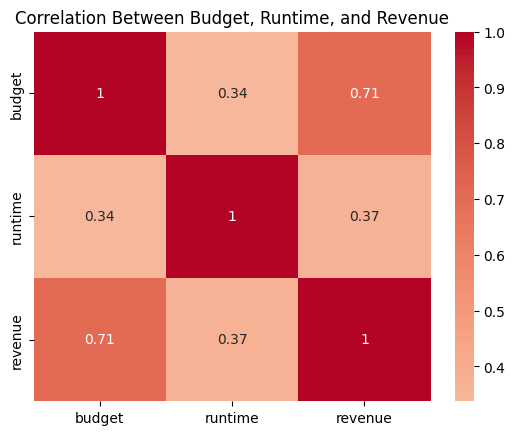

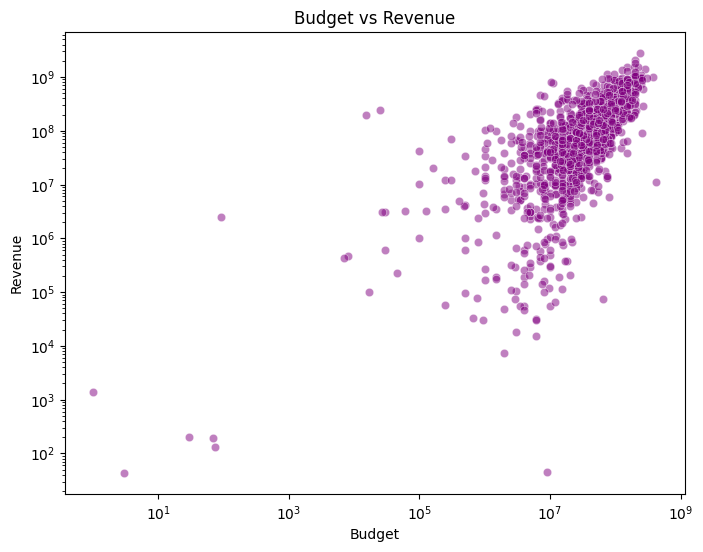

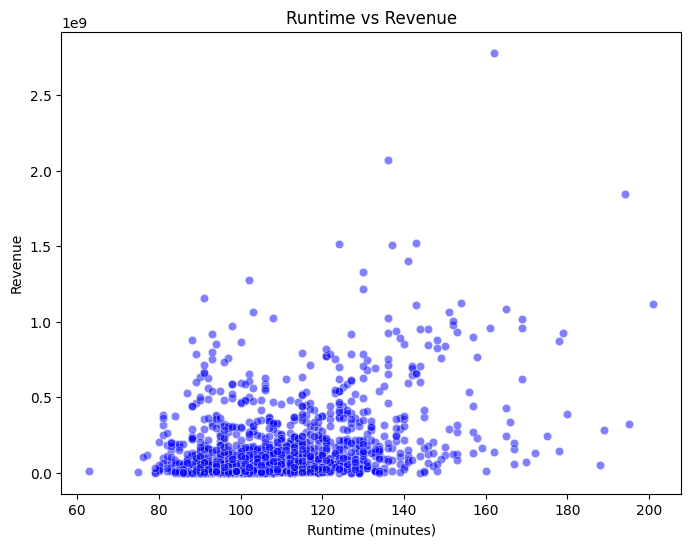

In [106]:
# Check correlation between budget, runtime, and revenue
df_corr = df[["budget", "runtime", "revenue"]].corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Budget, Runtime, and Revenue")
plt.show()

# Scatterplot of budget vs revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["budget"], y=df["revenue"], alpha=0.5, color="purple")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()

# Scatterplot of runtime vs revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["runtime"], y=df["revenue"], alpha=0.5, color="blue")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Revenue")
plt.title("Runtime vs Revenue")
plt.show()

### Research Question 2: Which genres have been the most successful over time?

In this part, i analyze the success of various genres. I track the popularity of genres over time and compute the average revenue per genre.

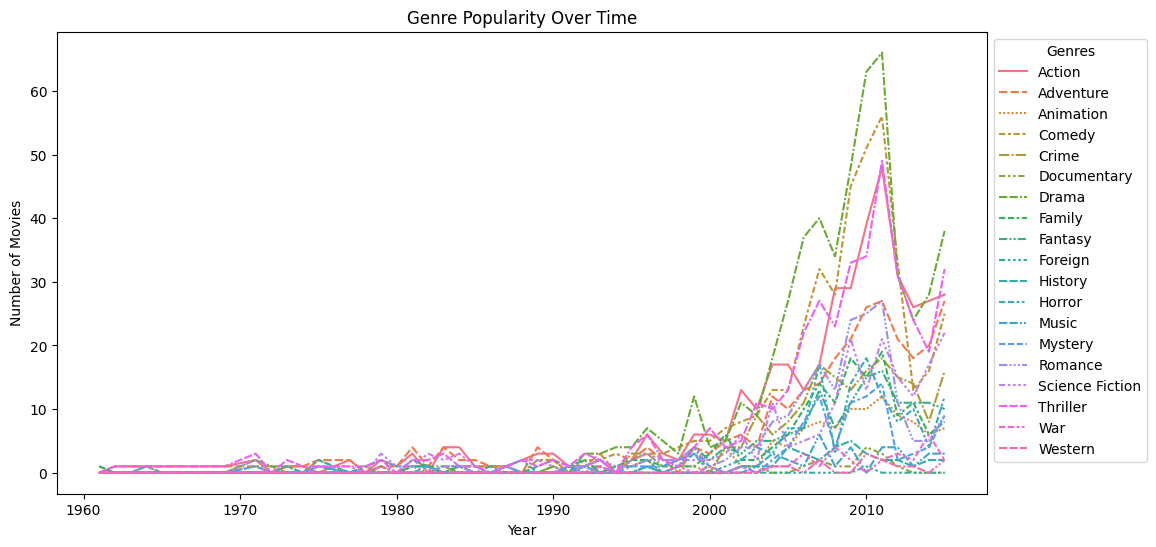

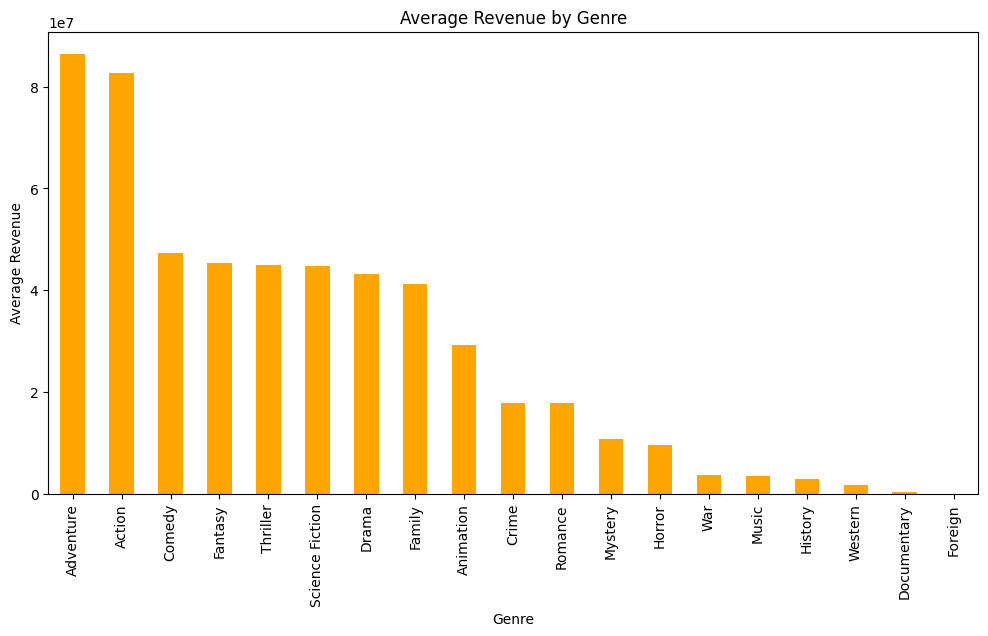

In [108]:
# Splitting 'genres' column and creating dummy variables for each genre
df["genres"] = df["genres"].fillna("")
genre_counts = df["genres"].str.get_dummies(sep="|").groupby(df["release_year"]).sum()

# Plot genre popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_counts)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Genre Popularity Over Time")
plt.legend(title="Genres", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Average revenue per genre
genre_revenue = df["genres"].str.get_dummies(sep="|").mul(df["revenue"], axis=0).mean()
genre_revenue = genre_revenue.sort_values(ascending=False)

# Bar plot for average revenue by genre
plt.figure(figsize=(12, 6))
genre_revenue.plot(kind="bar", color="orange")
plt.xlabel("Genre")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Genre")
plt.show()


### Research Question 3: How has the film industry evolved in terms of production and revenue?

In this section I focus on how the film industry has evolved in terms of production and financial success. I show the number of films produced and the average revenues over the years.

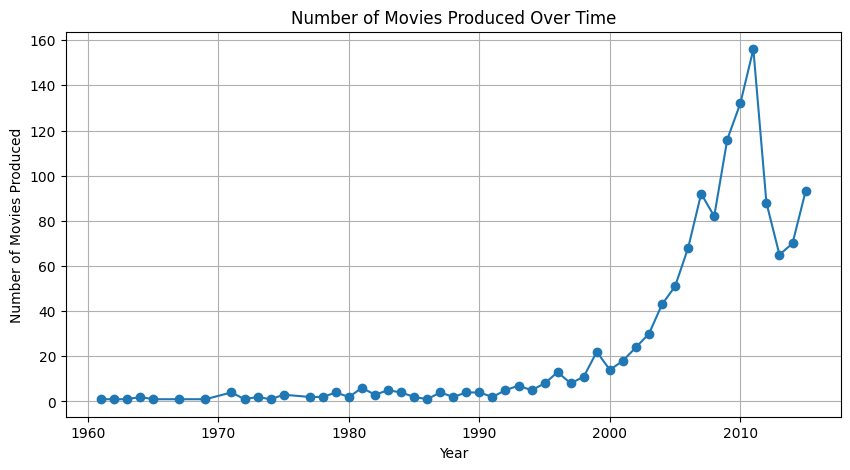

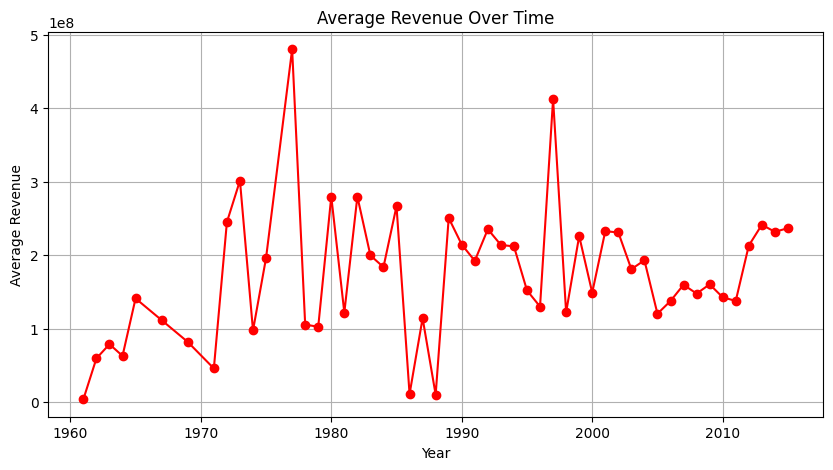

In [107]:
# Number of movies produced each year
movies_per_year = df.groupby("release_year").size()

# Plot the number of movies over time
plt.figure(figsize=(10, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Movies Produced")
plt.title("Number of Movies Produced Over Time")
plt.grid(True)
plt.show()

# Average revenue per year
avg_revenue_per_year = df.groupby("release_year")["revenue"].mean()

# Plot average revenue over time
plt.figure(figsize=(10, 5))
plt.plot(avg_revenue_per_year.index, avg_revenue_per_year.values, marker="o", color="r")
plt.xlabel("Year")
plt.ylabel("Average Revenue")
plt.title("Average Revenue Over Time")
plt.grid(True)
plt.show()


<a id='conclusions'></a>
## Conclusions

In this section, I summarize my findings results, limitations I imposed on the analysis, and the implications for my work.

> **Key Findings**: 
Budget and Runtime: Larger budgets correlate strongly with higher revenues, but runtime shows a weaker correlation with revenue.
Genre Popularity: Certain genres such as Action, Adventure, and Science Fiction consistently generate higher revenues. The popularity of genres has fluctuated over time.
Industry Evolution: The number of movies produced has increased over time, while average revenue has seen fluctuations, indicating shifts in industry dynamics.

> **Limitations**: 
The dataset is not complete for all years, and some columns (such as budget) had missing or zero values that could affect the analysis.
Additional research could involve exploring other factors

## Submitting your Project 


In [109]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 869043 bytes to Investigate_a_Dataset.html
